In [7]:
from scipy import signal
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

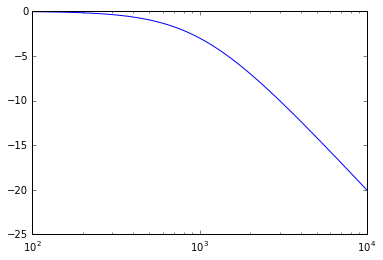

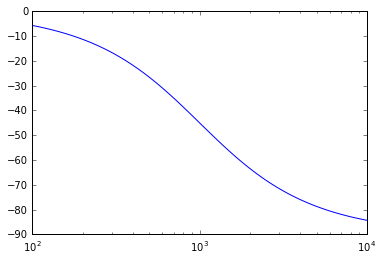

In [20]:
R = 10*10e3
C = 100/10e9
sys = signal.TransferFunction([1],[R*C, 1])
w,mag,phase = signal.bode(sys)
plt.figure()
plt.semilogx(w,mag)
plt.figure()
plt.semilogx(w,phase)